In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix,accuracy_score
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.special import expit
import pymc as pm
import numpy as np
import arviz as az

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r".\dataset\raw\CleanDataset.csv")
df.corr()['Attrition'].sort_values()

WorkExperience                     -0.216722
MonthlyIncome                      -0.202379
CurrentProfile                     -0.198538
Age                                -0.180490
MaritalStatus_Married              -0.165064
Designation_Manager                -0.141719
Designation_AVP                    -0.115766
Department_Analytics               -0.114451
Designation_VP                     -0.072545
EducationField_CA                  -0.052707
TravelProfile_Rarely               -0.051362
Gender_F                           -0.048519
EducationField_Statistics          -0.048031
LastPromotion                      -0.038565
Designation_Senior Manager         -0.032605
Unnamed: 0                         -0.023067
EmployeeID                         -0.023067
SalaryHikelastYear                 -0.006778
Department_Marketing                0.010778
ESOPs                               0.012200
WorkLifeBalance                     0.013608
HourlnWeek                          0.021145
EducationF

In [3]:
X=df[['Age','WorkExperience','MonthlyIncome','CurrentProfile','OverTime','MaritalStatus_Single']]

In [4]:
y=df['Attrition']

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [6]:
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)


Sampling with prior: N(0, 1²)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 58 seconds.



Sampling with prior: N(0, 5²)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.



Sampling with prior: N(0, 10²)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 64 seconds.



Posterior summary for prior N(0, 1²):


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],-0.203,0.048,-0.299,-0.112,0.001,0.001,3124.0,2682.0,1.0
w[1],-0.013,0.067,-0.149,0.113,0.001,0.001,2345.0,2447.0,1.0
w[2],-0.201,0.054,-0.304,-0.094,0.001,0.001,2983.0,2871.0,1.0
w[3],-0.238,0.041,-0.322,-0.160,0.001,0.000,3604.0,2937.0,1.0
w[4],0.558,0.036,0.491,0.633,0.001,0.000,4056.0,2678.0,1.0
w[5],0.385,0.036,0.315,0.453,0.001,0.000,4867.0,2912.0,1.0



Posterior summary for prior N(0, 5²):


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],-0.202,0.047,-0.291,-0.107,0.001,0.001,3050.0,2877.0,1.0
w[1],-0.015,0.066,-0.157,0.105,0.001,0.001,2367.0,2564.0,1.0
w[2],-0.201,0.055,-0.306,-0.091,0.001,0.001,3258.0,3195.0,1.0
w[3],-0.238,0.040,-0.312,-0.159,0.001,0.000,4191.0,2874.0,1.0
w[4],0.558,0.036,0.487,0.628,0.001,0.000,5091.0,2656.0,1.0
w[5],0.385,0.035,0.319,0.458,0.001,0.000,3806.0,2765.0,1.0



Posterior summary for prior N(0, 10²):


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w[0],-0.204,0.046,-0.291,-0.110,0.001,0.001,3465.0,2946.0,1.0
w[1],-0.013,0.065,-0.141,0.112,0.001,0.001,2440.0,2640.0,1.0
w[2],-0.200,0.054,-0.312,-0.101,0.001,0.001,3260.0,2977.0,1.0
w[3],-0.238,0.040,-0.321,-0.162,0.001,0.000,3550.0,2786.0,1.0
w[4],0.558,0.036,0.488,0.628,0.001,0.000,4617.0,3060.0,1.0
w[5],0.384,0.035,0.313,0.449,0.001,0.000,5015.0,3329.0,1.0


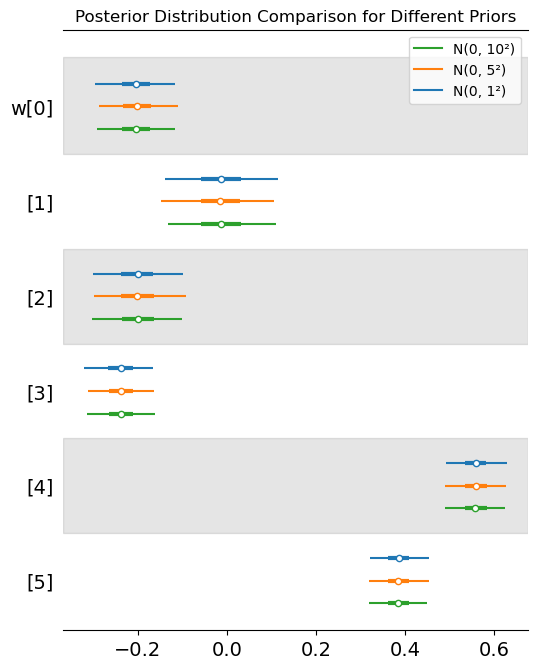

NameError: name 'expit' is not defined

In [9]:

# Function to run PyMC model with different priors
def run_model_with_prior(sigma_prior):
    with pm.Model() as model:
        w = pm.Normal("w", mu=0, sigma=sigma_prior, shape=Xtrain_scaled.shape[1])
        logits = pm.math.dot(Xtrain_scaled, w)
        y_obs = pm.Bernoulli("y_obs", logit_p=logits, observed=ytrain)
        trace = pm.sample(1000, tune=1000, return_inferencedata=True, target_accept=0.9)
    return trace
 
# Try different priors
priors = [1, 5, 10]
traces = {}
for sigma in priors:
    print(f"\nSampling with prior: N(0, {sigma}²)")
    traces[sigma] = run_model_with_prior(sigma)
 
# Posterior summaries
for sigma in priors:
    print(f"\nPosterior summary for prior N(0, {sigma}²):")
    display(az.summary(traces[sigma], var_names=["w"], hdi_prob=0.95))
 
# Visualize posterior weight distributions
az.plot_forest([traces[s] for s in priors],
               model_names=[f"N(0, {s}²)" for s in priors],
               var_names=["w"], combined=True)
plt.title("Posterior Distribution Comparison for Different Priors")
plt.show()
 
# Prediction function
def predict(Xtest, trace):
    w_samples = trace.posterior["w"].stack(sample=("chain", "draw")).values.T
    logits = Xtest @ w_samples.T
    probs = expit(logits)
    mean_probs = probs.mean(axis=1)
    return mean_probs, (mean_probs > 0.5).astype(int)
 
# Evaluate predictive accuracy for each prior
for sigma in priors:
    probs, preds = predict(Xtest_scaled, traces[sigma])
    acc = accuracy_score(ytest, preds)
    print(f"Accuracy with prior N(0, {sigma}²): {acc:.4f}")

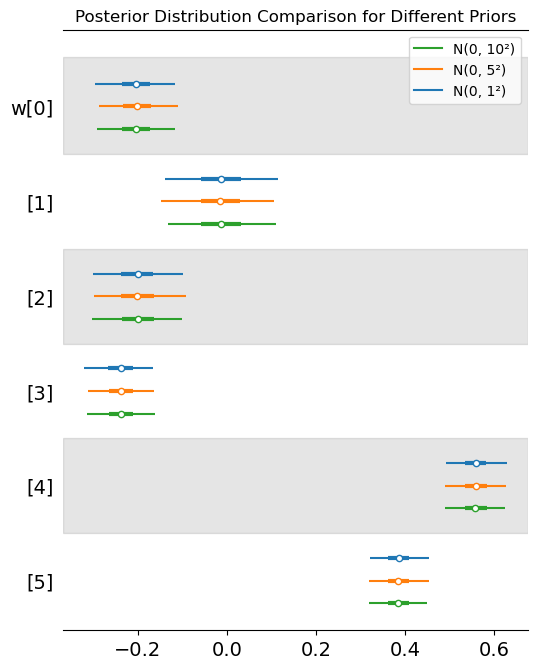

In [10]:
from scipy.special import expit
az.plot_forest([traces[s] for s in priors],
               model_names=[f"N(0, {s}²)" for s in priors],
               var_names=["w"], combined=True)
plt.title("Posterior Distribution Comparison for Different Priors")
plt.show()

In [11]:
def predict(Xtest, trace):
    w_samples = trace.posterior["w"].stack(sample=("chain", "draw")).values.T
    logits = Xtest @ w_samples.T
    probs = expit(logits)
    mean_probs = probs.mean(axis=1)
    return mean_probs, (mean_probs > 0.5).astype(int)

In [12]:
for sigma in priors:
    probs, preds = predict(Xtest_scaled, traces[sigma])
    acc = accuracy_score(ytest, preds)
    print(f"Accuracy with prior N(0, {sigma}²): {acc:.4f}")

Accuracy with prior N(0, 1²): 0.6486
Accuracy with prior N(0, 5²): 0.6479
Accuracy with prior N(0, 10²): 0.6486
